In [1]:
# Import and install requierd package
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import datasets, layers, models, losses
!pip install tensorflow-addons
import tensorflow_addons as tfa
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00


In [2]:
# Utility Functions
def average(input_data):
    return sum(input_data)/len(input_data)

def train_result(history, module_type='Train'):
  results = {
      'Loss' : history.history['loss'][-1] ,
      'Accuracy' : history.history['accuracy'][-1],
      'Precision' : history.history['precision'][-1],
      'Recall' : history.history['recall'][-1],
      'F1 Score' : history.history['f1_score'][-1],
      'Specificity': history.history['specificity_at_sensitivity'][-1],
      'Mean Absolute Error':history.history['mean_absolute_error'][-1],
      'R2 Score' : history.history['r_square'][-1],
      }
  return pd.DataFrame.from_dict(results, orient="index", columns=[module_type])
def test_result(history, module_type='Test'):
  results = {
      'Loss' : history[0] ,
      'Accuracy' : history[1],
      'Precision' : history[2],
      'Recall' :history[3],
      'F1 Score' : history[4],
      'Specificity': history[5],
      'Mean Absolute Error': history[6],
      'R2 Score' : history[7],
      }
  return pd.DataFrame.from_dict(results, orient="index", columns=[module_type])

In [3]:
# Load Mnist Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]]) / 255
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]]) / 255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
# x_val = x_train[-2000:, :, :, :]
# y_val = y_train[-2000:]
# x_train = x_train[:-2000, :, :, :]
# y_train = y_train[:-2000]
x_val = x_test
y_val =y_test

num_classes=10

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# lecunNet-5 structure based on its article
model = models.Sequential()
model.add(
    layers.Conv2D(filters=6, kernel_size=5, activation='tanh', strides=1, input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(pool_size=2))
model.add(layers.Conv2D(filters=16, kernel_size=5, activation='tanh', strides=1))
model.add(layers.AveragePooling2D(pool_size=2))
model.add(layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [5]:
# Model Setting
learning_rate = 0.01
weight_decay = 5e-4
batch_size = 256
epochs = 40
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, decay=weight_decay)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy',
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),
                      tfa.metrics.F1Score(num_classes,average='macro'),
                      tf.keras.metrics.SpecificityAtSensitivity(0.5),
                      tf.keras.metrics.MeanAbsoluteError(),
                      tfa.metrics.RSquare()]


In [6]:
# Compile model 
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
# Train Model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Model Evaluation
evaluate_result = model.evaluate(x_test, y_test, batch_size=batch_size)
print(evaluate_result)

Epoch 1/40
235/235 [==============================] - 12s 12ms/step - loss: 1.6605 - accuracy: 0.6202 - precision: 0.9888 - recall: 0.0926 - f1_score: 0.6073 - specificity_at_sensitivity: 0.9657 - mean_absolute_error: 0.1539 - r_square: 0.2205 - val_loss: 0.9237 - val_accuracy: 0.8124 - val_precision: 0.9868 - val_recall: 0.4200 - val_f1_score: 0.8066 - val_specificity_at_sensitivity: 0.9984 - val_mean_absolute_error: 0.1090 - val_r_square: 0.5400
Epoch 2/40
235/235 [==============================] - 3s 12ms/step - loss: 0.7138 - accuracy: 0.8396 - precision: 0.9604 - recall: 0.6162 - f1_score: 0.8364 - specificity_at_sensitivity: 0.9988 - mean_absolute_error: 0.0859 - r_square: 0.6475 - val_loss: 0.5586 - val_accuracy: 0.8721 - val_precision: 0.9519 - val_recall: 0.7526 - val_f1_score: 0.8696 - val_specificity_at_sensitivity: 0.9992 - val_mean_absolute_error: 0.0690 - val_r_square: 0.7276
Epoch 3/40
235/235 [==============================] - 4s 17ms/step - loss: 0.5183 - accuracy: 0.8

In [7]:
# Results
train_results = train_result(history, module_type='Train')
test_results = test_result(evaluate_result, module_type='Test')
final_result = pd.concat([train_results, test_results], axis=1)
print(final_result)

                        Train      Test
Loss                 0.209020  0.197426
Accuracy             0.939067  0.942700
Precision            0.955829  0.957471
Recall               0.925450  0.929800
F1 Score             0.938497  0.942288
Specificity          0.999909  0.999956
Mean Absolute Error  0.023095  0.022062
R2 Score             0.896022  0.901827


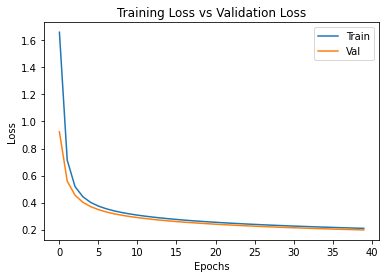

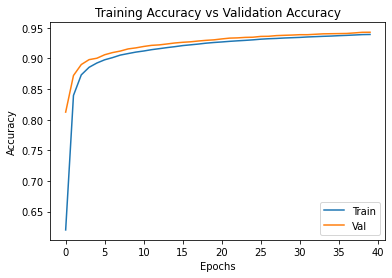

In [8]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()
